In [15]:

from os import path
import pickle
path="C:/Users/sawacha/Desktop/Transition and stuff/DSP 19/Project/raw/data_v2"
#pickle file import

with open(path, 'rb') as op_file:
    data = pickle.load(op_file)
# open pickle file for raw data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import boxcox1p        
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',500)

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 72 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

In [5]:
data.shape

(855969, 72)

In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.0

In [7]:
data.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,442
unique,2,7,35,290910,11,6,3,2,120335,14,60957,931,51,2,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,855964,231,505392,398089,9466,125172,442555,855527,252


In [8]:
data.describe(include=['datetime'])

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,855969,855969,847107,602998,855919
unique,103,697,97,3,102
top,2015-10-01 00:00:00,2001-08-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
freq,48212,6433,467510,534094,701687
first,2007-06-01 00:00:00,1969-01-01 00:00:00,2008-01-01 00:00:00,2016-01-01 00:00:00,2007-05-01 00:00:00
last,2015-12-01 00:00:00,2068-12-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00


In [47]:

# num_cols = ['annual_inc', 'annual_inc_joint', 'loan_amnt', 'collection_recovery_fee', 'funded_amnt', 'funded_amnt_inv',
#             'installment', 'int_rate', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 'total_pymnt_inv',
#             'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti',
#             'dti_joint', 'inq_last_6mths', 'inq_last_12m', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record',
#             'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
#             'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
#             'inq_fi', 'total_cu_tl', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']
# 
# cat_cols = ['emp_length', 'home_ownership', 'verification_status', 'verification_status_joint', 'zip_code',
#             'application_type', 'grade', 'initial_list_status', 'policy_code', 'purpose','sub_grade',
#             'pymnt_plan', 'term', ]
# 
# date_cols = ['issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line']
# 
# id_cols = ['id', 'member_id']
# 
# text_cols = ['emp_title', 'desc', 'title']

In [16]:
#This is initial phase of data cleaning where 
#I am dropping columns by looking at the their decription and the number of null values. 
#I have deleted columns which leak information about future. e.g. 'funded_amt', 'last_pymnt_amnt', 'installment', etc.
#'grade' and 'sub_grade' gives same information

data.drop(['id','member_id','funded_amnt','funded_amnt_inv','installment','sub_grade','emp_title'],axis=1,inplace=True)

In [19]:

data.drop(['desc','title','zip_code'],axis=1,inplace=True)
#Info in 'title' and 'purpose' is same


In [ ]:
data.drop(['mths_since_last_delinq','mths_since_last_record','out_prncp','out_prncp_inv','total_pymnt'],
          axis=1,inplace=True)


In [20]:
data.drop(['total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
          'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','policy_code',
          'mths_since_last_major_derog'],
          axis=1,inplace=True)

In [21]:

# Drop any column with more than 50% missing values
data = data.dropna(thresh=(len(data)/2),axis=1)

In [24]:
# Data Cleaning 2 : Null Imputation
# After initial data cleaning, we're left with 30 columns. Now I did analysis of each column

nulls_percent=[]
for i in data.columns:
    tmp=len(data[data[i].isnull()])/len(data)*100
    nulls_percent.append(round(tmp,2))
null_df=pd.DataFrame(data=nulls_percent,index=data.columns,columns=['% Nulls'])
null_df[null_df['% Nulls']!=0]


#I calculated percent null values in each column.
#
#Columns with null values : 'emp_length', 'revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
#As 'emp_length' is ordinal variable, I encoded it according to value instead of creating dummy binary variables. 'emp_length' less that one year was set to 0 and that greater than 10 years was set to 10.
#'tot_coll_amt','tot_cur_bal','total_rev_hi_lim' have missing values till Sept-2012 date.
#Other variables do not show any pattern in missing values


,% Nulls
emp_length,5.03
revol_util,0.05
collections_12_mths_ex_med,0.01
tot_coll_amt,7.86
tot_cur_bal,7.86
total_rev_hi_lim,7.86


In [25]:
columns_with_nulls=['emp_length','revol_util','collections_12_mths_ex_med','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [26]:

data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [27]:

def encode_emp_length(x):
    if type(x)==float: #Check for nan ,as only Nans are float while other values are str
        return x
    if x=='10+ years':
        return 10
    if x=='< 1 year':
        return 0
    else:
        return int(x.split(' ')[0])
    
data['emp_length']=data['emp_length'].apply(encode_emp_length)

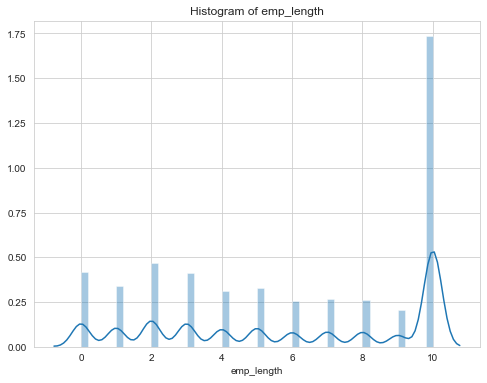

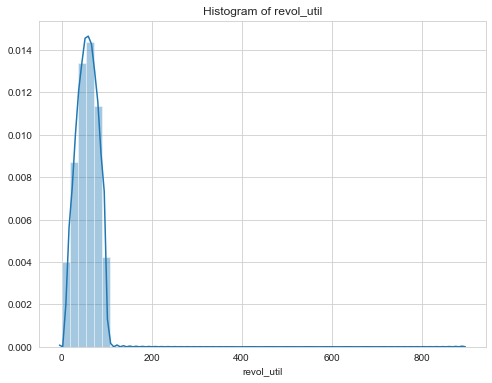

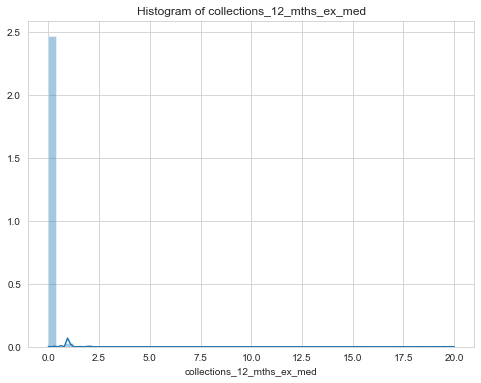

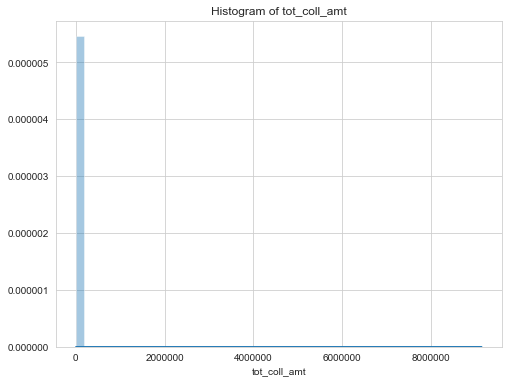

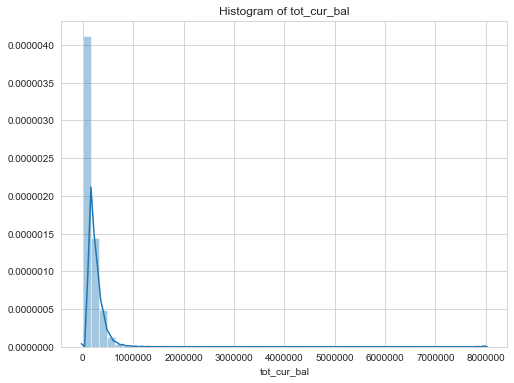

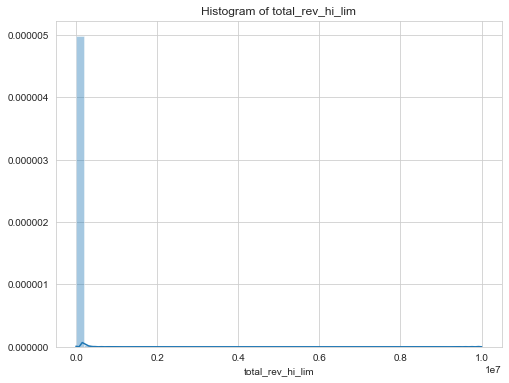

In [28]:
for col in columns_with_nulls:
    plt.figure(figsize=(8,6))
    sns.distplot(data[data[col].notnull()][col])
    plt.title('Histogram of {}'.format(col))

In [ ]:
#Looking at the histograms, columns can be imputed by median value. 
#I found that 'total_rev_hi_lim' is highly correlated with 'revol bal'. So, I had two methods to impute 'total_rev_hi_lim'.

#Impute by median value
#Fit a polynomial between 'total_rev_hi_lim' and 'revol_bal'
#As fitting a polynomial model didn't performed much better, I decided to go with method 1. Code for method 2 is commented below.

In [29]:
corr_matrix=data.corr()
for col in columns_with_nulls:
    tmp=corr_matrix[col].apply(abs).sort_values(ascending=False)
    print(col, 'shows max correlation with',tmp.index[1],':',round(tmp[1],2))

emp_length shows max correlation with loan_amnt : 0.11
revol_util shows max correlation with int_rate : 0.27
collections_12_mths_ex_med shows max correlation with delinq_2yrs : 0.06
tot_coll_amt shows max correlation with collections_12_mths_ex_med : 0.01
tot_cur_bal shows max correlation with revol_bal : 0.44
total_rev_hi_lim shows max correlation with revol_bal : 0.82


In [ ]:
# Fit a linear mode between 'total_rev_hi_lim' and 'revol_bal'

# from sklearn.metrics import mean_squared_error
# from scipy import polyfit,poly1d

# tmp1=data[data['total_rev_hi_lim'].notnull()][['revol_bal','total_rev_hi_lim']].copy()
# p=polyfit(tmp1['revol_bal'],tmp1['total_rev_hi_lim'],deg=2)
# poly=poly1d(p)
# tmp1['total_rev_hi_lim_pred']=tmp1['revol_bal'].apply(poly)
# print('RMSE:',np.sqrt(mean_squared_error(tmp1['total_rev_hi_lim'],tmp1['total_rev_hi_lim_pred'])))
# data['temp']=data['revol_bal'].apply(poly)

# i=data[data['total_rev_hi_lim'].isnull()].index
# data.loc[i,'total_rev_hi_lim']=data.loc[i,'temp']
# data.drop('temp',axis=1,inplace=True)

In [30]:
#Impute remaining columns with median

def impute_by_median(data,col):
    """
    Impute column by median value
    Params:
        data: Dataframe
        col: str, Name of column
    """
    med=data[col].median()
    data[col]=data[col].apply(lambda x: med if np.isnan(x) else x)

In [31]:
for col in columns_with_nulls:
    impute_by_median(data,col)

In [ ]:
# Data Cleaning 3: Miscellaneous
# I went thought each and every column to see whether it is useful or not and did necessasry processing.
# 
# 'term': has only two values. I converted it to binary variable later.
# 'grade': has 7 values. I created dummy variables for it.
# 'home_ownership': Changed OHTER, NONE, ANY to RENT as these data points are too low.
# 'verification_status': has 3 unique values. Created dummy variables.
# 'pymnt_plan': only 6 rows have 'y' value. Dropped this column
# 'purpose': has 14 unique values. Created dummy variables for it.
# 'addr_state':
# 
# There are total 51 states. So creating 50 dummy variables is not a wise choice. So, I did detailed analysis for 'addr_state'
# 
# Some states having very less loans. So I considered states having more than 1000 loan applications.
# 
# 'initial_list_status': don't seem to affect on 'loan_sttaus'. I dropped this column.
# 
# 'application_type': Almost all the values fall in one category. I dropped this column
# 'earliest_cr_line': Changed it to the number of days before the loan issued i.e. number of days between 'issue_date' and 'earliest_cr_line'
# Divide 'annual_inc', 'tot_cur_bal', 'total_rev_hi_lim', 'revol_bal' by 'loan_amnt'.
# 'collections_12_mths_ex_med': is very skewed with more than 90% values as 0.0. Also, default rate is similar for all values. I dropped this column as it is non-conclusive.

In [32]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [33]:
data['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [34]:
#home_ownership
data['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [36]:
#Change OHTER, NONE, ANY to RENT as these data points are too low.
data['home_ownership']=data['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE','ANY'] else x)

In [37]:
#verification_status
data['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [38]:
#pymnt_plan
print(data['pymnt_plan'].value_counts())
data.drop('pymnt_plan',axis=1,inplace=True)

n    855964
y         5
Name: pymnt_plan, dtype: int64


In [39]:

#purpose
print("Unique values in purpose column:",data['purpose'].nunique())
data['purpose'].value_counts()

Unique values in purpose column: 14


debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [ ]:
#addr_state
print("Number of unique values in addr_state column:",data['addr_state'].nunique())
#print("Number of unique values in addr_state column:",data['addr_state'].value_counts())

In [48]:
states_to_keep=['FL','NY','LA','NV','IN','CA','IL','GA','TX']

#Create dummy variables for these states
for i in states_to_keep:
    data['state'+i]=data['addr_state'].apply(lambda x: 1 if x==i else 0)
data.drop('addr_state',axis=1,inplace=True)

In [53]:

#initial_list_status
print(data['initial_list_status'].value_counts())

f    442555
w    413414
Name: initial_list_status, dtype: int64


In [54]:
data.drop('initial_list_status',axis=1,inplace=True)

In [55]:
#application_type
print(data['application_type'].value_counts())
data.drop('application_type',axis=1,inplace=True)

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


In [57]:

#earliest_cr_line
data['earliest_cr_line']=data['issue_d']-data['earliest_cr_line']
data['earliest_cr_line']=data['earliest_cr_line'].apply(lambda x:int(str(x).split(' ')[0]))


In [58]:
#Divide 'annual_inc','tot_cur_bal','total_rev_hi_lim','revol_bal' by 'loan_amnt'
tmp=['annual_inc','tot_cur_bal','total_rev_hi_lim','revol_bal']
for col in tmp:
    data[col]=data[col]/data['loan_amnt']

In [59]:
#Create dummy variables for categorical columns
cat_cols=['term','grade','home_ownership','verification_status','purpose']
for col in cat_cols:
    data=data.join(pd.get_dummies(data[col],drop_first=True))
data.drop(cat_cols,axis=1,inplace=True)

In [60]:
data.drop('collections_12_mths_ex_med',axis=1,inplace=True)

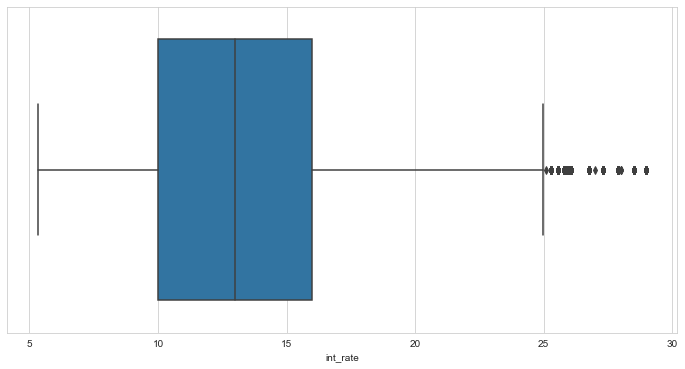

In [61]:
# Data Cleaning 4: Handling Outliers
# In this section I have checked for the outliers. Outliers may force our machine learning model to overfit. Handling outliers features helps to decrease the effect of outliers on machine learning model.
# 
# An easy way to detect outliers is to plot a box plot.
# 
# As an example I will explain how did I handle outliers for columns :
# 
# 1. int_rate
# 
# So, I've transformed this feature.

#int_rate
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.boxplot(x='int_rate',data=data,ax=ax)

#The points outside the whiskers of boxplot represents outliers.

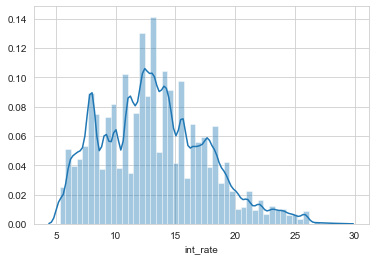

In [65]:
sns.distplot(data['int_rate'])

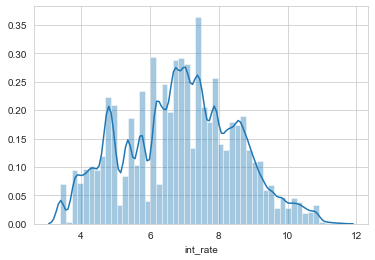

In [66]:

sns.distplot(data['int_rate'].apply(lambda x: np.log1p(x)**2))

In [67]:
data['int_rate']=data['int_rate'].apply(lambda x: np.log1p(x)**2)

In [71]:
# 2. dti
# 
# There is only one value greate than 40 which is 57.14. It is an extreme outlier, so I removed it. There is no need to apply any distribution.

data=data[data['dti']<40].reset_index(drop=True)

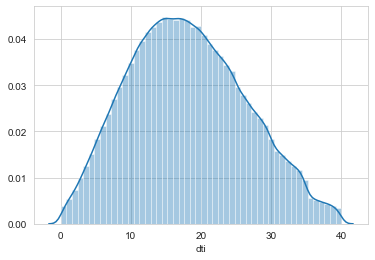

In [72]:
sns.distplot(data['dti'])

In [80]:
class Transform_Skewed_Features(BaseEstimator,TransformerMixin):
    """
    This class will transform skewed features in the dataset.
    Feature names as well as tranformations are hard coded in this class.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X.loc[:,'delinq_2yrs']=X['delinq_2yrs'].apply(lambda x : 5.0 if x > 5 else x)
        X.loc[:,'inq_last_6mths']=X['inq_last_6mths'].apply(lambda x: 4.0 if x>4 else x)
        X.loc[:,'open_acc']=X['open_acc'].apply(lambda x: 2.0 if x in [0.0,1.0] else x)
        X.loc[:,'open_acc']=X['open_acc'].apply(lambda x: 25.0 if x>25 else x)
        X.loc[:,'pub_rec']=X['pub_rec'].apply(lambda x: 4.0 if x>4 else x)
        X.loc[:,'acc_now_delinq']=X['acc_now_delinq'].apply(lambda x: 1.0 if x>1 else x)

        X.loc[:,'int_rate']=X['int_rate'].apply(lambda x: np.log1p(x)**2)
        X.loc[:,'annual_inc']=X['annual_inc'].apply(lambda x:boxcox1p(x,-0.7))
        #X=X[X['dti']<40].reset_index(drop=True)
        X.loc[:,'dti']=X['dti'].apply(lambda x: 40 if x>40 else x)
        X.loc[:,'revol_bal']=X['revol_bal'].apply(lambda x: np.log1p(x)**0.35)
        X.loc[:,'revol_util']=X['revol_util'].apply(lambda x: 140 if x>140 else x)
        X.loc[:,'total_acc']=X['total_acc'].apply(lambda x: np.log1p(x)**1.5)
        X.loc[:,'tot_coll_amt']=X['tot_coll_amt'].apply(lambda x: 80000 if x>80000 else x)
        X.loc[:,'tot_cur_bal']=X['tot_cur_bal'].apply(lambda x: np.log1p(x)**0.75)
        X.loc[:,'total_rev_hi_lim']=X['total_rev_hi_lim'].apply(lambda x: np.log1p(x)**0.5)
        return X

In [81]:
transformer=Transform_Skewed_Features()
data=transformer.fit_transform(data)

In [ ]:
# Data Cleaning 5: Multicolinearity
# I have also checked for multi-colinearity in data. Multicoliearity can be checked from variance Inflation Factor (vif). Basically, it detects highly correlated features from the data. Presence of highly correlated features in data will overfit the machine learning model. So, it is necessary to remove such features from data.
# 
# But, removing all such features may not always help and even in worst case it can make the model worse. So, it is always good to train model in both cases or try changing thrshold of vif. I have not much focused on this part.

In [83]:
data.drop(['issue_d'],axis=1,inplace=True)

In [84]:
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break

In [85]:
remove_by_vif(data)

Removed:  out_prncp , VIF:  360650.6592897338
Removed:  int_rate , VIF:  202.6648153324318
Removed:  revol_bal , VIF:  115.06021329052348
Removed:  annual_inc , VIF:  98.24157581655197
Removed:  total_acc , VIF:  46.67068379370079
Removed:  loan_amnt , VIF:  39.46315828673773
Removed:  total_rev_hi_lim , VIF:  28.47675695810027
Removed:  debt_consolidation , VIF:  19.93375954458318
Removed:  tot_cur_bal , VIF:  9.54718295056956
Removed:  dti , VIF:  7.093273685453384
Removed:  revol_util , VIF:  6.565953687780417
Removed:  open_acc , VIF:  5.642899088713082
